In [1]:
from rna_barrier_subtree_solver.subtree_solver import solve_subtree
from rna_barrier_subtree_solver.utilities import num_leaves, filter_common_bps, list_bps
from bisr_dpw.barriers_py3 import ssrandom
import time
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


color_list = sns.color_palette()

In [2]:
xs = []
ys = []
cs = []

theta = 1
unpaired_weight=0.1

params = set([])

for n in range(10,80,5):
    for inc in range(60):
        s1 = ssrandom(n, {}, theta=theta, unpaired_weight=unpaired_weight, seed=inc)
        s2 = ssrandom(n, {}, theta=theta, unpaired_weight=unpaired_weight, seed=inc+n)
        s1, s2 = filter_common_bps(s1, s2)
        print(s1,'->',s2)
        t0 = time.time()
        _, _, _ = solve_subtree(s1, s2)
        run_time = time.time() - t0
        param = min(num_leaves(s1), num_leaves(s2))
        assert param!=1, "phi=1 for "+s1+'->'+s2
        if param==0:
            continue
        if param==num_leaves(s1):
            xs.append(len(list_bps(s1)))
        else:
            xs.append(len(list_bps(s2)))
        
        ys.append(run_time)
        cs.append(color_list[param-2])
        params.add(param)


(((.)))(.) -> (((.(.))))
(.)(((.))) -> ((((.).)))
...(...).. -> ..(....)..
.......... -> ..........
(((.)))(.) -> (.)(((.)))
.(((..))). -> ..(((.))).
((......)) -> ((.....)).
((((.)))). -> (((.(.))))
.......... -> ..........
.((...)).. -> .((....)).
....(.)... -> ...(..)...
((((.).))) -> (..)((.)).
.((.(.))). -> .(.)((.)).
(((.)))(.) -> (((.(.))))
(.)((...)) -> (((.)...))
..((...)). -> .((....)).
((((.)))). -> ((.)((.)))
.......... -> ..........
((.))((.)) -> (.)(((.)))
.((....)). -> .((...))..
.(((..))). -> .((.))(.).
(..)((.)). -> .(..)((.))
((.)((.))) -> .((((.))))
.......... -> ..........
..(.)(.).. -> ..((..))..
....(.)... -> ...(..)...
((.)((.))) -> ((((.)))).
.((....)). -> ..((...)).
(.)(((.))) -> (((.(.))))
((((.))).) -> ((.))((.))
.((.))(.). -> .(.((.))).
.(..)(...) -> (((.))...)
.(.......) -> (........)
(((....))) -> .(((...)))
...(..)... -> ....(.)...
((((..)))) -> (((.)))(.)
(.......). -> (........)
(.(((.)))) -> ((((.)))).
.((.(.))). -> .(.)((.)).
((.))((.)) -> .(((..)).)


(.((((..)))((.)))(..(.))) -> .(((((((((.))(.)..)))))))
.(((.))(((.((((.))).))))) -> (((((.)(((((.))))(.))))))
.(((((.)))......((.).))). -> .(.)(((((((.....)))))).).
((.(...(.)(.)).))(......) -> ((((...)((((.)))))).....)
((((((((..))))(((.))))))) -> ((.((((((.)))(.))))))(.).
((((((.(..(.)).))).)))(.) -> .(((((((((((.))))))))).))
(((.))((((.)))(((.).).))) -> (((((((.(.))))))))(.(.).)
.(...(..(((.))(((.).))))) -> ((...(((((((.)))))))(.)))
.(((((.(.)))).))(.)((.)). -> .(.(((((((((.)).)))))))).
(((..)((..))))(((((.))))) -> ((((((.))))(((..)(.))))).
..(((((((.))(((.)))))))). -> .(((((.).).))(((.))))(.).
.((((((((..((.)))))))))). -> .(.)(((.(((.)))))((.).)).
(((.))((((((((..))))))))) -> ((.))(((.)((.))))((.))(.)
(.)((.))((((((.)))).)(.)) -> ((((((((.))))))))(((..)))
...((((((((.))).).))))... -> ...((((.))((((.))))))....
.(.((((((.((.))))))(.)))) -> ((.))((((((.))(((.)))))))
.((((.))))((((((.)))))).. -> .((.).((((.)))(.)((.)))).
(((.((.))))).(((((..))))) -> ((..(((((.)))((.)))(.))))
.(((..)(((

((((((((.)))))((.))))((((....)).))) -> ((((..)).))(((((((((.)))).....)))))
((((.))(((...)))))((((((((.)))))))) -> (.((..((((...(.)(((.))))))))((.))))
(.(((((((..))((.(.(.).(.)))).)))))) -> ((.))(((((((((.))))).)).)((.).(.)))
(((((((((.((..))((.)((.)))))))))))) -> (((((.))))((((.))((.))((((.))))))).
(((.))(((((..(..(((.))).)..).))).)) -> (.)(((.))((...(...((.)).)..((.)))))
(.)((.))((((((.(((.))).)))).)((.))) -> ((.)((.).))(((.(.).(.).(.))(.(.))))
((((((((((.)(..)))((.))((.))))))))) -> (.)((((.)))(((((((.)))))((.(.))))))
.(.((((((.((((...))))))))(((.)))))) -> ((((((((((((((...(.).))))))))))))))
.((((..).)))((((((.)(...(.).)))))). -> .((((.)(((.)))((.)(((...)))))(.))).
(((.(((.))))))(((((((((.))).))))).) -> (((.)).(((((..((((((..).)))))))))))
((.))((.((((((((.)))))).)).)((((.).)).)) -> ((.((((..)(.(((.))(.).)))))((..)((.)))))
((.))(((((...(((.))))))))((((((.))))..)) -> ((((.))(((...))))((((((.))(((.))))))))..
.(.(.)((((((((.))((((.))))))))(.)(.)))). -> ..((((((.))))).((.))((.)))(((..)))((

((((.))((.)))(((((((((.(.....((.))))))))))))) -> ((.(((((((.)))(((.)).))(......).)))))(((.)).)
((((.((.)(.)))((.((.(((((.(((.))))))))))))))) -> .((((((((((((((((((.)))))))).)))))).))((.))))
(.)(((((.))))((((.))((.)(((.))))((((.)))))).) -> ((((((((.((.)))(((.))).)))))))(((((..)))(.)))
.((((((((.)((.))((.))))).))((.)((.)))))((.)). -> .((.)((((((((((.(.(.)))).)))))..)))((.(.)))).
.(.((((.))(.))(((........).))))((..(((.))))). -> .(.(((((((((((.)((.......)))(.)))(.))))))))).
.(.)(.....(((.))((.))(((.)((((.)...)(.))))))) -> (((((.....)))((.)(((.)(.).))((((...)))))))(.)
(.)(((((.)(((((.((.)((.))))))))))))((.)((.))) -> (((((.)((.((.)))))).(((..))(.)((.))))(((.))))
.(((((((.....)(((((.)))))))))((.(((.))))).)). -> .(.)(((......(((.)))(..)))(((((((..))).))))).
((((((((((.)((.))((((.))..)))((.)))))(.)))))) -> ((.))((((.))(((((.)))))))((((.(.(.))))((.))))
(((((((((((((((.)))))(.)))))))((.(....))))))) -> (((((((((((((.))))))))).))))(((.))(....).(.))
((((((.(((((((.).)))))((((.)))))))))))(((.))) -> (

(((.))((((((.)))))((((.((.)))))(((.))((((.)))))))) -> (((.(((.((.((..)))(.((.(((.).))))))))))(.).))((.))
.((.)(..(((..))...((((.))(.(.)))((((.)))))....))). -> ((((.))((.)))((...(((((.)))))((((((.)))).))...))).
((((((((.))..)))(((((.)))))))(((((((((.).))))))))) -> ((.).)(((((.).((((((((.)))(((.)))))((.)))(.)))))))
((((.))((((((.).)))))))(((((.(((.(.))))(..)))))).. -> ((((((.)))))(((((.))))(.))((((((((((.))))))).)).))
(.((((((((.)))((.(..(.(.))((((..))))).))(.))).)))) -> ((.).)((((.(((((((((.))(.).)((((.))))).))))))))..)
....(((((.(((.)))((((.)))(..)(((((.))))))))))).... -> ....(.(((.))(..)))((.(((.)))))(((.)))((((.))))....
.((.))((((((((.(((((((((.)))(.))))))))))).)))(.)). -> .((((((.(((.)))))).)((((((((((.(.)))))))(.))))))).
(.)((..))(((((((((((((.).)))))))))))...)(.(((.)))) -> (((((((((.).)((((.).)((.)))))(.)))((...)))))((.)))
..(((((((.(((((.)))))))((.((.))((((.))))))).)))).. -> ...((.((((((.))))(((((.)((.)(..)))).(.(.))))))))..
.(.((((((.((((((((((.))))))))))))))(...(((.))))))) -> (

((.))((((((.)(((.((.(.)))))))))))..((((((.)..))((((.))))).)) -> ((((((((((((.))(((((.))).)))(.)))(.))))(((.).)))((((.)))))))
.(.(.)((((((((.).)(((((..((.)(.)))(.))))))))).((((.)))).))). -> .((((.))))(((((.)))(..)((((.(.))(((((.))(.))))))(.))))((.)).
(((((..(((((.)))))))).))(((.).)((.(((.((((((.)))))))(.)))))) -> (((((.).((.)((.).))(((((((.)))))(.))(.)))))((((.)))(((.)))))
((.)((.))((((.....)))))(.)((((((((.))))((.)(((.)((.))))))))) -> ((((.(((((((......)))(.)..(.)(((.)((.)))((((.)).))))))))).))
((((((.(((((.)(((.(((.)))((.)))))((.)(((.)).....)))))))))))) -> (((((((((.((((.((.)))))((.))))))(.))))))(((.....))((..))).).
(.((.((((((((((.)).)))(.).)).))))((((.)((...(.(.)))))..))).) -> ..((((((((.).)))))(.((.)))))(((((((((((((...)))))))).)))))..
(((.).)(.(.(.(.)((..)((((.((((.)))(.))))))))))(.))((((.)))). -> (.)(((((((.(.((.))).)((.(((((.)).((((((.))))))))))).))).)).)
(((.)(.)((.)((.)))))((.((.))))((((.)(.(((((((.)))).))))).)). -> (((((.)(((((((((.(.(.)))))).))(.)))(((((((((.)))))))))).))))


((((.)))(.(.(.(.)((..)((((.(((.(.))(.))(.))))))))))...).((((.)))) -> .((((((((((((((((((.)).)).(((.))(.))))).)(.).))))))...))(((.)))))
(((.)(.)(((((.)))))))((((.))..))(((.)(.(((((((((.).))))).)).))).) -> ((((((((.(((.))))(((((((.)(.))))))))))))))(((((..).(.))(((.))))))
.(((.))(((.)(.(((((((.)))((((((.)(((((.))))))).)))))))(.)))))(.). -> .((.)((((((((((.((.)(((((.)))))))).(..))))))(.).)))(.((.(.)))).).
..((((((((.)))))))((.(((((((((.)((((.)))))))))((.))....).)))))... -> ...(((((((((((.)(((((.((((.)))))(.))).)))(((.)))))(...))))))))...
((((((((((..))))(.)(.(((((.(.))((.)(.))(((((((.)))))))))))))))))) -> ((((((((.))))))(.)((.(((((.)))))))(.(((.)((.)(.(((.))))))))))(..)
.(((...)((((((((.))(.(.(((((.)))))))))))))((...((.)(.)((.))))))). -> .(((...((((.))(.(.))))))((((((.)))((((.)))((...)))))))((((..)))).
((((((.)(.))(..)(((((.)))))(.)))))(((((((((((.).))))(((.))))))))) -> ((.)(((.((.))(((.).))(((.)))((.))))(((((.(.)).)((((.))))(.)).))))
(.)(((((((((((.))).)).)))(((((.)))))(.))(.)(.)((((((((.

(((.)(.)(((.))(...))))((.).((((...(.((((.))).))).)))((((.))(...(.))))) -> ((.)(((.((.))((....))((((.))))(...)))(((.(((.))))((.((.))))(...))..)))
((((.))((...(.(.(((((.)))((((((.)((((.)(.)(.)))))).))))).)(.)))))(.).) -> ((.).)(((...))(.(((((((.(((((.)))))))(.)(.)(.)).))(.)))..(((((.)))))))
((((((((((.)))))))((.(((((((((..)((...(.))))))))(((((.))))))..)))))).) -> ((((((((((((.(((.(.))))(.))))))).))(.)))))(.(.).(((.))(.)))((((.)).)).
...((((((((.)))))(.)(.(((((.(.).)(.(((((.))))))((((.))(.)))))))))))... -> ...(((((.)))(((((..)(((((..)))))(.))(.(.)))(.))((((((.))))).))))(.)...
(((((.))((((((((.))(.(.((((..(.)))))))))))))(.)((.)(.)((..).((.))))))) -> ((.).)((((((.)))(.)(((.))((((.((.)))(((((((.(((.)))))))))))))(...)))))
((((((((.))))(..)((((.(.)))))(.)))))(((((((...........))(((..)).)))))) -> (((.).((((((.)))))((((((((.))(((.)).)))((((............)))).(.))))))))
(.)((((((((((((.)))))).)))(((.....)))((.)))((.)((((((((.)))))))))(.))) -> ((..(((((((.).))))((((((.).(......)))))).(((.)))(((.))))

((((((.(((((.)(((.((((.))))(.((.))))))(((..).(.))((((.)))(.(.)))))))))))))) -> ((((((((((((.(((.(.))))((.)))))))).))(.)))))(.)..(((((((((.))))).)).)((.)))
...(.(((((((((((....))))))(((.))))).))))...(((.)(((((((.).)).)))((.)))))... -> ...(((((.)))(((((...)((((((.))))))(.))((...)))(.))(((((((.)))))).))))(.)...
((((.)))(.(.(.(.)(((.))((((.((.....(((.))))((.))))).)))))).(.))(((.....))). -> ((.).)((((((.)))(.)(((.))((((.......)((((((.(((((.))))).)))).))))).....))))
((...(.)(((....))(.))))(.).(((((.)(.((((((.)))))))).)))(((.))((((.)))(..))) -> ((....(((((...))).)(((((((.))((((.))))))(((((((((.))))(..)).))))((.))))))))
.(((.))(((.)(.(((((((.)))((((((.)((((.)((.)(.))(.)))))).)))))))(.)))))(.).. -> .(..(((((((.).))))((((((.).((.)((.))))))))(((.)).)((((.)))))(((((.).)))))).
((((((((((.)))))))((.(((((((((..)((..(((.))))))))))(((((.)))).))(.))))))).) -> (((.)(((.)))))(((((((((.(((.))))))))((((((((.)).)))((((((.)))).(.))))))))))
.(((((((((...))))(.)(.(((((.(.).)(.((((((.)))))))((((((..))))).)))))))

.(((.((((.)))))))((((.)(.((((.)((.))((((((((.)))..)))))((.)))(.))...)))).). -> .(((((((((((((.(((.)).(.(.))))(.)(.))((.)(((.(.))))(.))))))))))((...)).))).
(((.(((.(((.)).)))))))((((((...((.((((.(((.))))(.).))))(....)))))))(((.)))) -> ((((((.(.))))))(((((.(((((.)...)))).(.))))((((((((.))(((...))))))))).))(.))


{2, 3, 4, 5, 6, 7, 8, 9, 10}


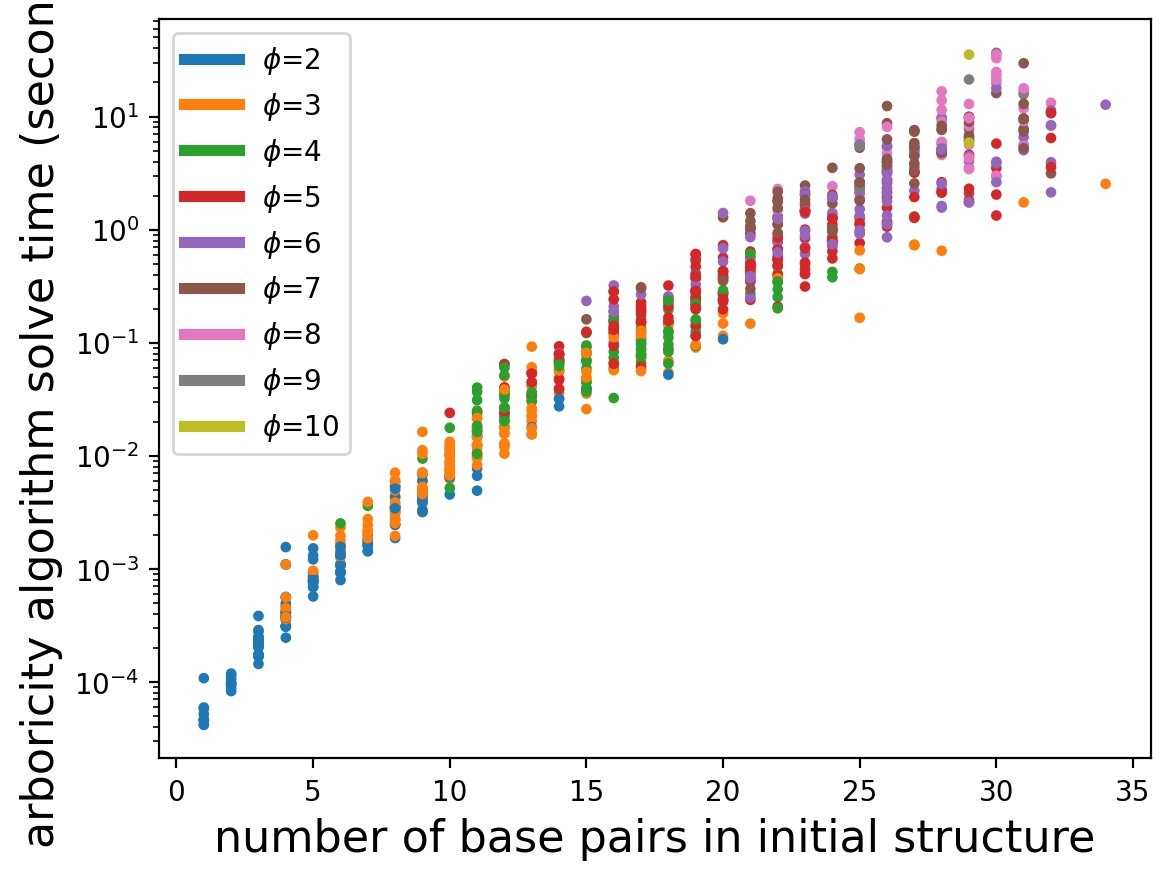

In [3]:
print(params)
plt.figure(dpi=200)
plt.scatter(xs, ys, c=cs, s=[8 for _ in xs])
plt.yscale('log')
custom_lines = [Line2D([0], [0], color=c, lw=4) for c in color_list[:max(params)+1-2]]

plt.xlabel('number of base pairs in initial structure',fontsize=16)
plt.ylabel('arboricity algorithm solve time (seconds)',fontsize=16)
plt.legend(custom_lines, [r'$\phi$='+str(param) for param in range(min(params), max(params)+1,1)])
plt.savefig('runtime_phi.pdf')
plt.show()

In [4]:
from rna_barrier_subtree_solver.utilities import list_bps
from rna_barrier_subtree_solver.subtree_solver import neighbor_dict

In [5]:
import rna_barrier_subtree_solver.subtree_solver as subtree_solver
subtree_solver.re_init_dp_table()
from bisr_dpw.dpw_interface import solve_dpw

ts_dpw = []
ts_subtree = []
cs = []
params = set([])

instances_phi_faster = []

nds = []
dpws = []

theta = 3
unpaired_weight=0.5

for n in range(100,101,5):
    for inc in range(200):
        s1 = ssrandom(n, {}, theta=theta, unpaired_weight=unpaired_weight, seed=inc)
        s2 = ssrandom(n, {}, theta=theta, unpaired_weight=unpaired_weight, seed=inc+n)
        s1, s2 = filter_common_bps(s1, s2)
        param = min(num_leaves(s1), num_leaves(s2))
        invert = num_leaves(s1) > num_leaves(s2)
        
        # neighborhood diversity computation
        bps1 = list_bps(s1)
        bps2 = list_bps(s2)
        N = neighbor_dict(bps1,bps2)
        types = []
        processed = []
        L = bps1 if not invert else bps2
        for bp in L: 
            for bp2 in types:
                if [ngbh for ngbh in N[bp] if ngbh!=bp2]==[ngbh for ngbh in N[bp2] if ngbh!=bp]:
                    continue
            types.append(bp)
        
        nds.append(len(types))
        
        assert param!=1, "phi=1 for "+s1+'->'+s2
        if param==0:
            continue
        params.add(param)
        print(s1,'->',s2,"nd =", len(types), end=" ")
        t0 = time.time()
        k1, _, phi = solve_subtree(s1, s2)
        ts_subtree.append(time.time() - t0)
        
        t0 = time.time()
        k2, _, dpw = solve_dpw(s1, s2)
        ts_dpw.append(time.time()-t0)
        
        dpws.append(dpw)
        print("dpw =",dpw, end=" ")
        
        if ts_dpw[-1]>=ts_subtree[-1]:
            instances_phi_faster.append((s1,s2))
            print("phi faster")
        else:
            print("dpw faster")
            
        cs.append(color_list[param-2])

        assert(k1==k2)
        

(...(..(.(.(((...(.(((.(...((((((..(..((.(......((.(((..(((..(...)))))))).)))))))).).)))))))))))))). -> .((((((.....((...)))).))))..((.((((.(...((.((..((.((((((.((.(.((((((...)))))))))).)))))))))))))))))) nd = 31 dpw = 10 dpw faster
.(..(.((..(.(..(.((..((......(...(..(((.((..((((((...))))))))))))(((..((((...)))))))).)).))))))))..) -> (..(((...(.(...(.(.(.....((((....(.((..(.(......(((...)))).)))...)))))))..)))))..(((.(((...))))))).) nd = 31 dpw = 5 dpw faster
((...((.(.....(((.....(..(((....(((.((((((.((.(((((...)))).)))))))))))).)).)).(((...)))..)))..))).)) -> .(.(..((...(((....((.(.(.(((...(((..(..((.(.((((.(((((((...))))))))))))))))).))))).).)).)))....)).)) nd = 32 dpw = 5 dpw faster
.(.((..(..(((((.(((((.((..((((((.(.((...(.(.(..(((((((...))))))).).)))))))))).)))))).)))).))..))))). -> ((((..(..((...(....(...))))))))(.(((..((((...(((((.(....(.((..(((((((...))))))))))).)).)))).)))))))) nd = 35 dpw = 12 phi faster
......(((.(....((((..((((.(((.(.(((.(((((.(...(..(.((((.......))..)).)

...(.((.((..(((.(.(..(......(...(((((...(((.((((..(((....(.....)).).))))).).))).))))))))))))).)))... -> ...((....(.(.((.....((.(...((.(((..((.(...(.((....((.....(..((...)))))))...))).))))))))).)))).)).... nd = 28 dpw = 4 dpw faster
.(((((.(...(((((.((..(((.(.(.(.(.(...(.(...((.(.......((.......)))))...).).)))))).)).)))))).).)))))) -> ((.(..(.(...(((.((.(.(.(.(((..((((.(.(......((..((.(...........)).))).....).)))))).)))))))))).)))).) nd = 28 dpw = 2 dpw faster
(.(((((.(.((..(.(((....(((((.(......(...(((.((((..(.....(..(...))).)).))))))..).)))))))))))).)).)))) -> ..(..((((((..(..(.(.((((.....(.((..(.(.((.((.((..(.(.(((...)..)))).)))))).))...))).))))))).).))).))) nd = 30 dpw = 2 dpw faster
(.(.(.(....((((.((.(..((((.(.((.(..((...))....(.(.(.(((.((((...)))).)))))).)))).)))).).).))))..))))) -> .((...))...(((((((..(.(......(.((((((((((..(..((.(..(.(...(((...)))))))))..).))))))).)).)))).)).)))) nd = 31 dpw = 4 dpw faster
....((...(.(....(((.((...(..(((((((...(.(.((...)))))))))))))(((..((.(((.

..(.(.(((......((...(.((..((...))))))..))))))((((.((..(((((..((((...(.....((...))))).))))))))))))).. -> .((....(.(.(((.((.(......((..(....(....((...)))))))..)((((.(((.(.(..(....(...))))))))))).))).).)))). nd = 30 dpw = 6 dpw faster
.(.(((.....(.((....(..(.(((...((........(((....((..(((((..((((((...)))))))))))).)))).).))))))))))))) -> (((.(((.(...((((((...((.((((((((.(...(..(((.(.(((((..(...)))).).).).))).).))).)).))))))))))))))))))) nd = 30 dpw = 5 dpw faster
.((.(.(((((..((.(.(.......((.(.(((.(....(....((((.(((.((..(((...))))))).)))).))))))).)))))))))))).)) -> (.((((.(((.((..(.....((((.(...(..((...)))).)))))))))))....((((..(...((((((...(...)).)))).)))))))))). nd = 32 dpw = 4 dpw faster
.((((((...(...(.(((.((((((.((...)))))).)))))))).).))(.(.(..((((.(..(..(..((..(...)))))))).))..))))). -> .((((.(.(..((((..((..(...)))))...((..(.((((((...))))))))((..(.((((((..(((...))))))))))).).)))))).))) nd = 32 dpw = 4 dpw faster
.(...((..(((.(....((...))))(..(...))))(..((.((.(((.((.(.(..((.(.((...(..

..((.(...(.(....(((.(((((.(((.((((.((...)))))))))).)))))))(((((((......(((((.....))))))))))).)))))). -> .((((.((.(.((.(.(..(...((.(((((.((((..(.(.(((..((....(..(...))))))).)))))).).))).)))))))))).))).).). nd = 32 dpw = 8 phi faster
((.((.((...((...))(..(..(...(..(.(((......(....((((((.(..((.........).).)).).)))))).)))))).)..)))))) -> ..((((..(..(.((..((.(...((((..(((....(((..((....((..(((.............))).))))))))))).))))))))).).)))) nd = 28 dpw = 4 dpw faster
.((((..((.(((...(((....(....(.(...(((((..(((((((((((((((((...))))))))))))))))))))))))).))))))))).))) -> (((..(.((....(......((.((.(...((..(.(((..(.(.(.....(...))))))))))(((((.((.......)))))).))))))))))))) nd = 37 dpw = 13 dpw faster
..(......(..((..(.(((.((..(((.(((((((..(..(.(.((.(((.(.((((...)))).))))).))))))).))).)))))))))))))). -> ...(.((.(((..(.((...(.((.(((((((.((((((((.(((.(.(((..(((...))))))))).))))))))))))))).))).)))))))))). nd = 33 dpw = 5 dpw faster
.((.(((((..(.((((..((((...))))))))))).))).))...(..(((((((((.((((((.((((

...(.(..((.((..(((.(.(((.((((((((...(.(.(.((((.((((.(((...)))).))))))))).).).)))))))))).)))))))))).. -> ..(.(((...(((((.(.(((.((((.(((.(.(....((...(...(.(((...))).))))).).))))))).)))).)).)).((...))))).)). nd = 35 dpw = 7 dpw faster
..(.(..(((...((.(..(.(...(((((((....(((..((..(....((......((...))...)))..)))..)))).)))))).))))))))). -> .(.((.((.....(.((((((..((((..(.(....((.((.......(.(..(..(((...)))..)))...))))))))))).)).).)))).)))). nd = 27 dpw = 3 dpw faster
((((.(...(((.....((((..(..(.(((.......(.....(...((((.(...((.(..(...))).)))))))))))))))).)).)))).).)) -> ((((((....((((...)))))).))).).....(..((((.((.(......(((.(..(((((.((.((((...))))))))))))))))).))).))) nd = 28 dpw = 11 dpw faster
.(...((((((.(((.((.(..(..(((((((((..((..(..(..(...))))))))).)))))))..((((..((...)))))))))))))))).)). -> .(.(.(...))(.((...(.((.(.(.(.(....(((....(((.(((((((((...)))).)))))).).))).)..(((...)))))))))))))).. nd = 34 dpw = 7 dpw faster
.((((.(((..(...))))))))(....((((.(...(.(...(..((...(......(((((.((.(((.

..(((((.(((.(.((.((.((((((.(....((.(.(((((..(.((((.....)))))).))))..)))))).))..)))).).)))).).))).)). -> .((....(((..((((.((...((.(((((.(..((((.(..(...(..(.(..(.(.(((...)))))).)))))).))))))))))))))))))))). nd = 33 dpw = 5 dpw faster
.(..((((.(.(..(.(((...(.(.(.(.....(...(((...)))))).....((..(.((.....((...)))).)).)..))))..).)))))))) -> (.((..(.(...(......(.(((..(((..((.((((..((((.(.((((((..((...))))))).).).))))))).)))))).)))).)).)))). nd = 32 dpw = 9 dpw faster
.((((..(((((...((...(((.(.((.(.(..(((...))))))))))(.(((..(..(((((((...))))))).)))..)))))))))).)))).. -> .(..((..((..((..((.....(((((...))))).)...((....(....(((.(...(..(.(.(((...)))))).))).))))))))).))..). nd = 34 dpw = 7 phi faster
.((...((.((..(((.(..((..(.(((.((..(..((((.(.(((((.(.((((...))))))))))).)))))))).)))))).)).)))))..)). -> .(....(....(..(..((.((..(((...))))))))).)(.(...(((((..(..((..(...((.(.(((...))))..)))))))))))))..).. nd = 34 dpw = 7 dpw faster
..(.(..((.(.((.(((...((.(.((.(.(((.(...(((((.((((((.(((...)))))).))..).)

In [6]:
from bisr_dpw.dpw_interface import solve_dpw

In [7]:
print(dpws)

[10, 5, 5, 12, 4, 6, 10, 9, 7, 11, 5, 5, 6, 6, 6, 10, 6, 3, 7, 3, 2, 2, 7, 6, 4, 5, 10, 3, 8, 3, 7, 4, 8, 3, 7, 4, 2, 2, 4, 6, 8, 6, 3, 8, 6, 5, 6, 4, 6, 4, 4, 8, 5, 8, 3, 4, 3, 3, 2, 6, 8, 10, 8, 10, 7, 3, 7, 4, 7, 6, 6, 5, 4, 4, 7, 5, 7, 5, 6, 8, 2, 4, 6, 8, 6, 7, 5, 4, 9, 5, 7, 8, 10, 4, 8, 6, 3, 8, 6, 8, 9, 7, 7, 7, 4, 8, 4, 13, 5, 12, 7, 5, 5, 4, 7, 10, 8, 2, 6, 5, 2, 2, 9, 5, 4, 5, 7, 4, 7, 6, 3, 6, 10, 2, 10, 6, 4, 4, 4, 3, 7, 3, 11, 7, 5, 5, 5, 9, 5, 2, 3, 8, 7, 5, 3, 6, 3, 9, 5, 9, 8, 5, 10, 9, 8, 3, 4, 7, 4, 6, 8, 4, 8, 6, 4, 5, 9, 7, 7, 6, 7, 8, 4, 4, 7, 3, 4, 4, 6, 7, 5, 5, 7, 3, 3, 4, 2, 7, 6, 6]


In [14]:
marker_dict = {}
set(cs)
markers = ['o','P','']
for k,c in enumerate(set(cs)):
    marker_dict[c] = markers[k]

{(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725)}

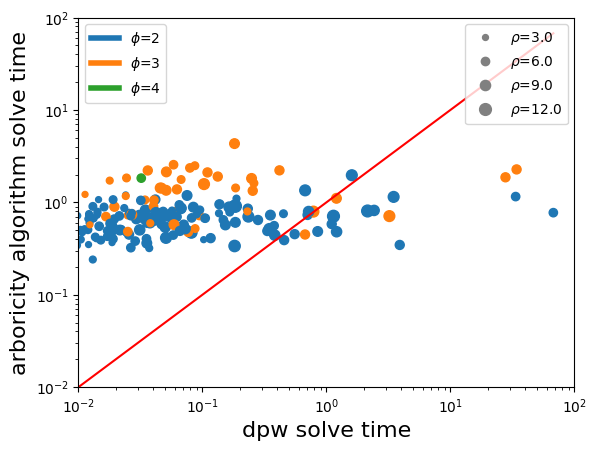

In [8]:
ratio = 6

sc = plt.scatter(ts_dpw, ts_subtree, c=cs,s=[ratio*d for d in dpws])

plt.xlabel('dpw solve time',fontsize=16)
plt.ylabel('arboricity algorithm solve time',fontsize=16)
custom_lines = [Line2D([0], [0], color=c, lw=4) for c in color_list[:max(params)+1-2]]
legend1 = plt.legend(custom_lines, [r'$\phi$='+str(param) for param in range(min(params), max(params)+1,1)])
#dpw_legend_lines = [Line2D([], [], color="white", marker='o', markersize=dpw,  markerfacecolor="slategray") for dpw in range(2,20,5)]
plt.legend(*sc.legend_elements("sizes", num=4,color="gray",fmt=r'$\rho$={x}',func=lambda x: x/ratio ),loc=1)
#plt.legend(dpw_legend_lines, [r'$\rho=$'+str(dpw) for dpw in range(2,20,5)]
M = max(max(ts_dpw), max(ts_subtree))

plt.plot([0,M],[0,M], c='r')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,100)
plt.ylim(0.01,100)
plt.gca().add_artist(legend1)
plt.savefig('scatter_dpw_phi.pdf')

In [9]:
print(instances_phi_faster)

[('.(.((..(..(((((.(((((.((..((((((.(.((...(.(.(..(((((((...))))))).).)))))))))).)))))).)))).))..))))).', '((((..(..((...(....(...))))))))(.(((..((((...(((((.(....(.((..(((((((...))))))))))).)).)))).))))))))'), ('..(..(((.(.((.((.((.(((..((...(.((.(.(((((((..(.(.(((...))).).)))))).))))))))))))))).)))))(...)))...', '...((.((.(.((...))(..(..(...(..(.(((......(....((((((.(..(((((...)))).).)).).)))))).)))))).).)))))..'), ('...(...(((((...((((((..(((((((..(((...))))))))))).))))))))(.(.(.(((((.((.((((...)))))))))).)).))))).', '..(((...((((.((...(..((.((.(((((((.(.......(..((...((....(..((...))))).).))))))).)))))))))))).))))).'), ('(..((((.(((((...(.((.(.((.((.(.(((..((.((..(.((...((.(((((...))))))).).)))))))))))))))))))))))))))).', '(.(.(..(((...((.(..(.(...(((((((....(((..(((.(....((..((..((...)))).)))).)))..)))).)))))).))))))))))'), ('.((.(((.(.((((.((((.((..(((..(((....((...)(..((.((((((....(.(...)).))))))))))))))))))))))))).)))))))', '((.((.(..(...(..(.((.(.((..(((..((...(((...(.(((...(.

In [10]:
def biclique(n):
    s1 = n*'('+n*'.'+n*'('+n*'.'
    s2 = n*'.'+n*'('+n*'.'+n*')'
    print(s1)
    print(s2)
    return s1,s2

In [11]:
#ns = range(1,200,10)
#ts_subtree = []
#ts_dpw = []
#for n in ns:
#    s1, s2 = biclique(n)
    
#    t0 = time.time()
#    _, _ = solve_subtree(s1, s2)
#    ts_subtree.append(time.time() - t0)
    
#    t0 = time.time()
#    _, _ = solve_dpw(s1, s2)
#    ts_dpw.append(time.time()-t0)


In [12]:
#plt.plot(ns, ts_dpw,'o-',label='dpw')
#plt.plot(ns, ts_subtree,'o-',label='subtree')
#plt.legend()
#plt.show()